<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/TF_Basic/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N , D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (D,)),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

In [ ]:
print('Train score: ', model.evaluate(X_train, y_train))
print('Test_score: ', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9738
Train score:  [0.12461553514003754, 0.9737532734870911]
6/6 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9947
Test_score:  [0.09521433711051941, 0.9946808218955994]


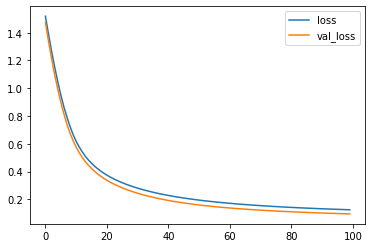

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

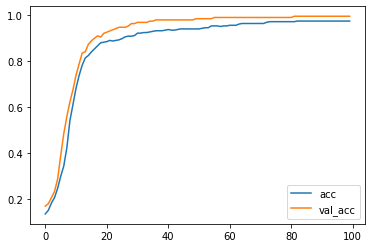

In [ ]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [ ]:
p = model.predict(X_test)
print(p)

In [ ]:
import numpy as np
p = np.round(p).flatten()
print(p)

In [ ]:
print("Manually calculated accuracy:", np.mean(p == y_test))

Manually calculated accuracy: 0.9946808510638298


In [ ]:
print("Evaluate output:", model.evaluate(X_test, y_test))

6/6 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9947
Evaluate output: [0.09521433711051941, 0.9946808218955994]


In [36]:
model.save('linearClassifier.h5')

In [37]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul  8 18:42 linearClassifier.h5
drwxr-xr-x 1 root root 4.0K Jul  6 13:22 sample_data


In [38]:
mdoel = tf.keras.models.load_model('linearClassifier.h5')
print(model.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9947


[0.09521433711051941, 0.9946808218955994]